In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [41]:
import pandas as pd
df = pd.read_csv('Airports Database v2.csv', index_col=0)

In [9]:
import dataclasses


df_graph = dataclasses.loc[:,["Source Airport ID", "Destination Airport ID"]]

In [18]:
#directed network object 
G_directed=nx.from_pandas_edgelist(df, source = 'Source Airport ID', target = 'Destination Airport ID', create_using=nx.DiGraph())

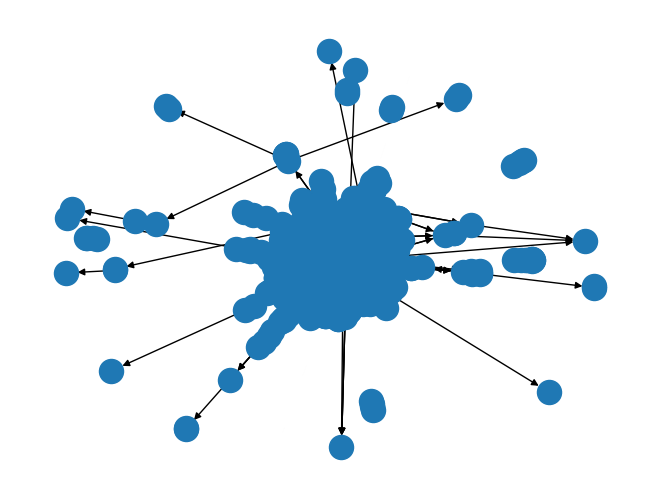

In [15]:
#draw directed 
nx.draw(G_directed)

In [22]:
#adjacency matrix
df_adj = nx.to_pandas_adjacency(G_directed, dtype=int)
df_adj

,2965,2990,2966,2962,2968,4078,4029,6969,\N,6160,...,6307,6792,6794,6276,9904,6337,6287,6294,6302,6793
2965,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2990,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2966,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2962,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2968,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
#in degrees 
G_directed.in_degree

InDegreeView({'2965': 18, '2990': 21, '2966': 7, '2962': 16, '2968': 14, '4078': 53, '4029': 189, '6969': 7, '\\N': 117, '6160': 3, '6156': 9, '2952': 10, '2922': 39, '2948': 112, '2975': 66, '2972': 9, '4364': 10, '2936': 4, '2937': 27, '2935': 9, '8944': 1, '6924': 1, '9026': 2, '2923': 21, '2925': 6, '2786': 1, '2789': 57, '2812': 5, '2808': 2, '6067': 1, '2801': 4, '2781': 3, '2806': 3, '253': 20, '247': 2, '246': 14, '248': 28, '1044': 16, '1084': 31, '245': 19, '298': 14, '280': 9, '2709': 74, '2673': 18, '2688': 24, '2715': 18, '6045': 1, '2670': 2, '1506': 19, '1678': 136, '1264': 49, '490': 72, '1665': 100, '1054': 83, '1197': 55, '4197': 4, '1056': 83, '730': 1, '719': 2, '737': 123, '715': 4, '709': 3, '688': 2, '718': 2, '5595': 2, '442': 3, '722': 1, '448': 3, '664': 30, '746': 4, '729': 2, '711': 6, '5599': 1, '435': 2, '460': 7, '644': 104, '3531': 5, '7167': 1, '7168': 1, '7162': 1, '7164': 1, '7163': 1, '7176': 1, '7173': 1, '7161': 1, '7165': 2, '7172': 1, '6019': 1, 

In [26]:
#calculate in-degree for each node using adjacency matrix (sum over rows)
np.sum(df_adj, axis=0)

2965    18
2990    21
2966     7
2962    16
2968    14
        ..
6337     2
6287     1
6294     3
6302     2
6793     1
Length: 3334, dtype: int64

In [27]:
#out degree
G_directed.out_degree

OutDegreeView({'2965': 17, '2990': 21, '2966': 7, '2962': 16, '2968': 14, '4078': 52, '4029': 188, '6969': 7, '\\N': 115, '6160': 3, '6156': 9, '2952': 10, '2922': 39, '2948': 110, '2975': 65, '2972': 9, '4364': 10, '2936': 4, '2937': 27, '2935': 9, '8944': 1, '6924': 1, '9026': 2, '2923': 21, '2925': 6, '2786': 1, '2789': 57, '2812': 5, '2808': 2, '6067': 1, '2801': 4, '2781': 3, '2806': 3, '253': 21, '247': 2, '246': 15, '248': 30, '1044': 16, '1084': 31, '245': 18, '298': 14, '280': 8, '2709': 74, '2673': 19, '2688': 23, '2715': 18, '6045': 1, '2670': 2, '1506': 19, '1678': 137, '1264': 49, '490': 73, '1665': 101, '1054': 80, '1197': 53, '4197': 4, '1056': 83, '730': 1, '719': 2, '737': 123, '715': 4, '709': 4, '688': 2, '718': 2, '5595': 2, '442': 3, '722': 1, '448': 3, '664': 30, '746': 4, '729': 2, '711': 5, '5599': 1, '435': 2, '460': 7, '644': 104, '3531': 8, '7167': 1, '7168': 1, '7162': 1, '7164': 2, '7163': 1, '7176': 0, '7173': 1, '7161': 0, '7165': 1, '7172': 0, '6019': 1,

In [28]:
#calculate out degree for each node via adj matrix (sum over columns)
np.sum(df_adj, axis = 1)

2965    17
2990    21
2966     7
2962    16
2968    14
        ..
6337     2
6287     1
6294     3
6302     2
6793     1
Length: 3334, dtype: int64

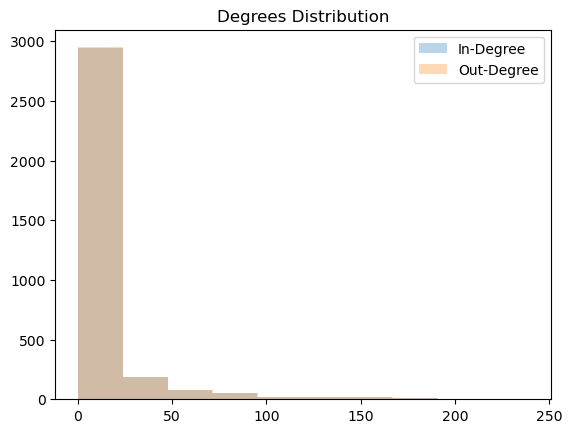

In [32]:
#in/out degree distribution
in_degree = dict(G_directed.in_degree())
out_degree = dict(G_directed.out_degree())

plt.hist(in_degree.values(),  alpha=0.3, log = False, label = 'In-Degree')
plt.hist(out_degree.values(),  alpha=0.3, log = False, label = 'Out-Degree')
plt.title('Degrees Distribution')
plt.legend()

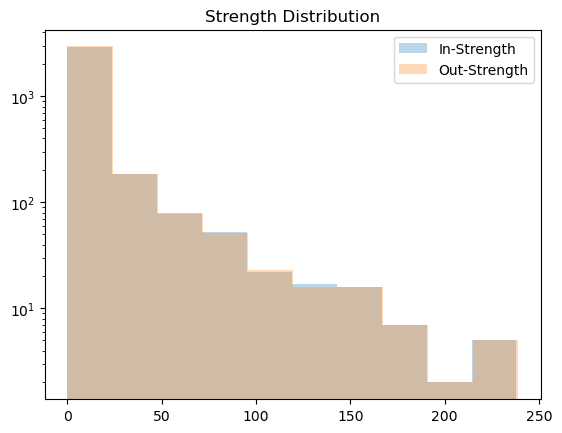

In [33]:
#strength distribution
in_strength = dict(G_directed.in_degree(weight = 'weight'))
out_strength = dict(G_directed.out_degree(weight = 'weight'))

plt.hist(in_strength.values(), bins = 10, alpha=0.3, log = True, label = 'In-Strength')
plt.hist(out_strength.values(), bins = 10, alpha=0.3, log = True, label = 'Out-Strength')
plt.title('Strength Distribution')
plt.legend()


In [34]:
max(out_strength, key=out_strength.get)

'340'

In [35]:
max(in_strength, key=in_strength.get)

'340'

In [38]:
#grouped table 
data_grouped = df.groupby(['Source Airport ID', 'Destination Airport ID']).count()
data_grouped

Airline ID  Source Airport  \
Source Airport ID Destination Airport ID                               
1                 2                                1               1   
                  3                                1               1   
                  4                                1               1   
                  5                                2               2   
10                5446                             1               1   
...                                              ...             ...   
\N                883                              1               1   
                  907                              1               1   
                  9229                             1               1   
                  94                               2               2   
                  \N                              18              18   

                                          Source Airport Name  \
Source Airport ID Destination Airport ID                        
1                 2                                         1   
                  3                                         1   
                  4                                         1   
                  5                                         2   
10                5446                                      1   
...                                                       ...   
\N                883                                       1   
                  907                                       1   
                  9229                                      1   
                  94                                        2   
                  \N                                        3   

                                          Source Airport City  \
Source Airport ID Destination Airport ID                        
1                 2                                         1   
                  3                                         1   
                  4                                         1   
                  5                                         2   
10                5446                                      1   
...                                                       ...   
\N                883                                       1   
                  907                                       1   
                  9229                                      1   
                  94                                        2   
                  \N                                        3   

                                          Source Airport Country  \
Source Airport ID Destination Airport ID                           
1                 2                                            1   
                  3                                            1   
                  4                                            1   
                  5                                            2   
10                5446                                         1   
...                                                          ...   
\N                883                                          1   
                  907                                          1   
                  9229                                         1   
                  94                                           2   
                  \N                                           3   

                                          Destination Airport  \
Source Airport ID Destination Airport ID                        
1                 2                                         1   
                  3                                         1   
                  4                                         1   
                  5                                         2   
10                5446                                      1   
...                                                       ...   
\N      

In [39]:
data_table = pd.read_table("Airports Database v2.csv", sep = ',', encoding = 'UTF-8', header = None)
data_table.columns = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID' 'Source Airport Name', 
                    'Source Airport City', 'Source Airport Country', 'Destination Airport ', 'Destination Airport ID', 'Destination Airport Name', 'Destination Airport ID', 'Destination Airport City', 'Destination Airport Country', 'Codeshare', 'Stops', 'Equipment', 'Source Member Country', 'Destination Member Country', 'Route']

C:\Users\jessi\AppData\Local\Temp\ipykernel_1816\2618912123.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_table = pd.read_table("Airports Database v2.csv", sep = ',', encoding = 'UTF-8', header = None)


In [ ]:
#links histogram ???? 

In [19]:
#undirected network object 
G_undirected=nx.from_pandas_edgelist(df, source = 'Source Airport ID', target = 'Destination Airport ID', create_using=nx.Graph())

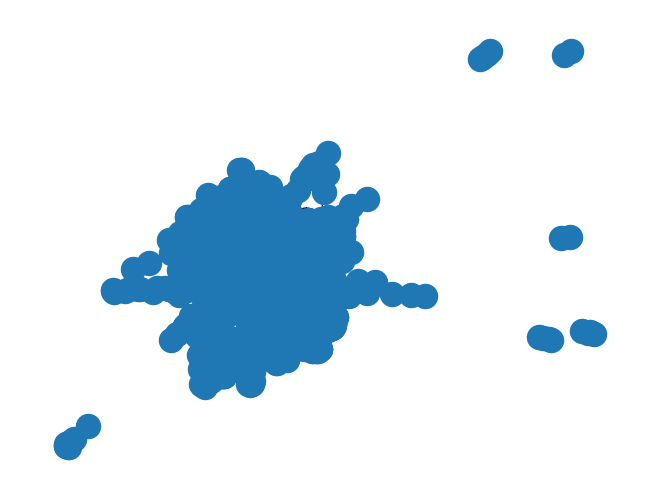

In [20]:
nx.draw(G_undirected)